# Monte Carlo Simulation for Social Distancing to Prevent COVID-19 Infection

This notebook holds the analysis for the Monte Carlo Simulation.

In [29]:
# Dependencies

import pandas as pd
import numpy as np
import seaborn as sns

from grid import Grid

sns.set_style('whitegrid')


In [30]:
# Simulation setup

# Grid size
grid_height = 100
grid_width = 100

# Simulation parameters
population_size = 1000
infection_rate = 0.009
mobility = 0.75
p_death = 0.06
infection_duration = 10
max_evolutions = 1000

# Percentage of stationary population (per simulation)
stationary_percentages = np.arange(0, 1.1, 0.1).round(2).tolist()

# Simulation per stationary population
# TODO: Update this to 10000 for proper run
run_per_stat_percentage = 2


In [35]:
# Running simulation


# DataFrame creation

df = pd.DataFrame({
    "Stationary Percentage": [],
    "Death Rate": [],
    "Max Infection Rate": [],
    "Max Infection Rate Period": [],
    "Total Infection Rate": [],
    "Stop Period": []
})



for stat_percentage in stationary_percentages:
    
    death_rates = []
    max_infection_rates = []
    max_infection_rate_periods = []
    total_infection_rates = []
    stop_periods = []
    
    for _ in range(run_per_stat_percentage):
        
        last_evolution = 0
        
        max_infection_rate = 0
        max_infection_rate_period = 0
        
        last_dead_person_count = 0
        last_immune_person_count = 0
        last_infected_person_count = 0
        
        g = Grid(grid_height, grid_width, population_size, infection_rate,
                 stat_percentage, mobility, p_death, infection_duration)
                        
        for evolution in range(max_evolutions):

            if g.is_outbreak_stable():
                last_evolution = evolution
                break

            g.perform_evolution()
            
            current_snapshot = g.get_current_snapshot()
            
            current_dead_person_count = current_snapshot["dead_person_count"]
            current_immune_person_count = current_snapshot["immune_person_count"]
            current_infected_person_count = current_snapshot["infected_person_count"]
            
            current_infection_rate = (current_infected_person_count - last_infected_person_count)
            current_infection_rate += (current_immune_person_count - last_immune_person_count)
            current_infection_rate += (current_dead_person_count - last_dead_person_count)
            
            if (current_infection_rate > max_infection_rate):
                max_infection_rate = current_infection_rate
                max_infection_rate_period = evolution
            
            last_dead_person_count = current_dead_person_count
            last_immune_person_count = current_immune_person_count
            last_infected_person_count = current_infected_person_count

        
        final_snapshot = g.get_current_snapshot()
        
        final_dead_person_count = final_snapshot["dead_person_count"]
        final_immune_person_count = final_snapshot["immune_person_count"]
        final_infected_person_count = final_snapshot["infected_person_count"]
        
        total_infection_rate = final_dead_person_count + final_immune_person_count + final_infected_person_count
        
        death_rates.append(final_dead_person_count)

        max_infection_rates.append(max_infection_rate)
        max_infection_rate_periods.append(max_infection_rate_period)
        total_infection_rates.append(total_infection_rate)
        
        stop_periods.append(last_evolution)
                
        
    new_df = pd.DataFrame({
        "Stationary Percentage": np.repeat(stat_percentage, run_per_stat_percentage),
        "Death Rate": death_rates,
        "Max Infection Rate": max_infection_rates,
        "Max Infection Rate Period": max_infection_rate_periods,
        "Total Infection Rate": total_infection_rates,
        "Stop Period": stop_periods
    })

    df = df.append(new_df, ignore_index=True)

In [36]:
display(df)

,Stationary Percentage,Death Rate,Max Infection Rate,Max Infection Rate Period,Total Infection Rate,Stop Period
0,0.0,9.0,12.0,0.0,125.0,91.0
1,0.0,7.0,14.0,0.0,82.0,130.0
2,0.1,2.0,9.0,0.0,23.0,72.0
3,0.1,6.0,9.0,0.0,97.0,70.0
4,0.2,7.0,9.0,0.0,66.0,135.0
5,0.2,6.0,9.0,0.0,77.0,182.0
6,0.3,1.0,9.0,0.0,11.0,10.0
7,0.3,1.0,9.0,0.0,13.0,22.0
8,0.4,1.0,10.0,0.0,15.0,31.0
9,0.4,1.0,9.0,0.0,20.0,48.0


In [14]:
# Show graphs for each category against each stationary percentage

mean_df = df.groupby("Stationary Percentage").mean()

display(mean_df)

,Death Rate,Max Infection Rate,Total Infection Rate,Stop Period
Stationary Percentage,,,,
0.0,4.5,18.0,66.0,73.5
0.1,1.5,14.5,53.5,77.0
0.2,3.0,13.5,34.5,48.5
0.3,1.0,13.5,40.0,41.5
0.4,1.0,12.0,34.5,68.5
0.5,1.5,10.5,44.0,86.5
0.6,3.0,10.5,19.5,41.0
0.7,0.0,9.0,13.5,37.5
0.8,0.0,8.0,10.0,33.5


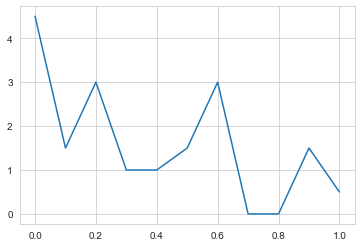

In [15]:
# Plot for Death Rate

sns.lineplot(data=mean_df["Death Rate"])

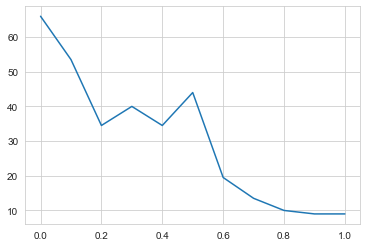

In [16]:
# Plot for Total Infection Rate

sns.lineplot(data=mean_df["Total Infection Rate"])

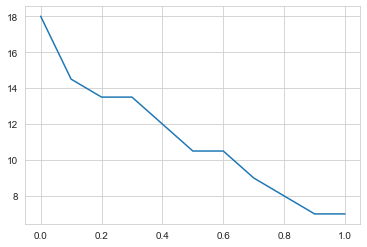

In [17]:
# Plot for Max Infection Rate
sns.lineplot(data=mean_df["Max Infection Rate"])

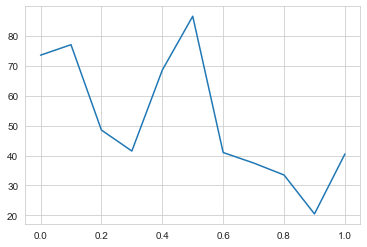

In [19]:
# Plot for Average Stop Period
sns.lineplot(data=mean_df["Stop Period"])